# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [4]:
def display(images, labels, axis='off', cmap=None):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=(15,10))
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

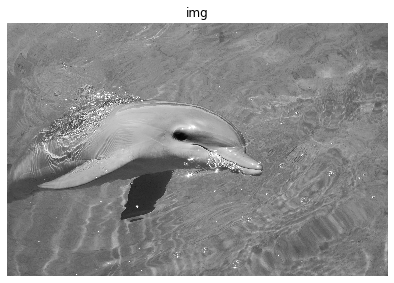

In [10]:
from scipy import fftpack
from numpy import pi
from numpy import r_

img = cv2.cvtColor(cv2.imread('images/dolphin.jpg'), cv2.COLOR_BGR2GRAY)


display([img],['img'], cmap='gray')



In [13]:
def dct2(a):
    return fftpack.dct( fftpack.dct( a.T, norm='ortho' ).T, norm='ortho' )

def idct2(a):
    return fftpack.idct( fftpack.idct( a.T , norm='ortho').T,norm='ortho')

In [32]:
imsize = img.shape
dct = np.zeros(imsize)
block_size = 8

for i in r_[:imsize[0]: block_size]:
    for j in r_[:imsize[1]: block_size]:
        dct[i: i + block_size, j: j + block_size] = dct2(img[i:i+ block_size, j: j+ block_size])

Text(0.5, 1.0, 'An 8x8 DCT block')

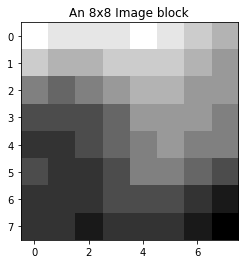

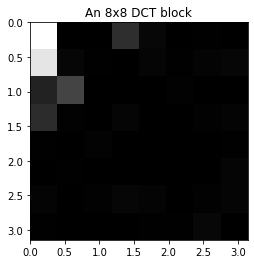

In [34]:
pos = 0

# Extract a block from image
plt.figure()
plt.imshow(img[pos: pos + block_size, pos: pos + block_size], cmap='gray')
plt.title(f"A {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos: pos + block_size, pos: pos + block_size],
           cmap='gray',
           vmax=np.max(dct)*0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"A {block_size}x{block_size} DCT block")

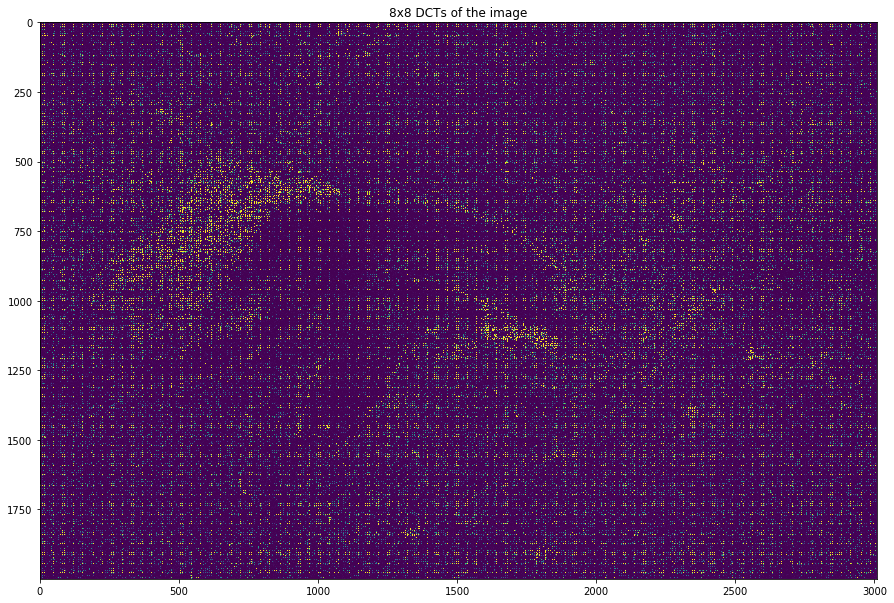

In [37]:
# Display entire DCT
plt.figure(figsize=(15,15))
plt.imshow(dct,vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image");

Keeping only 2.974601% of the DCT coefficients


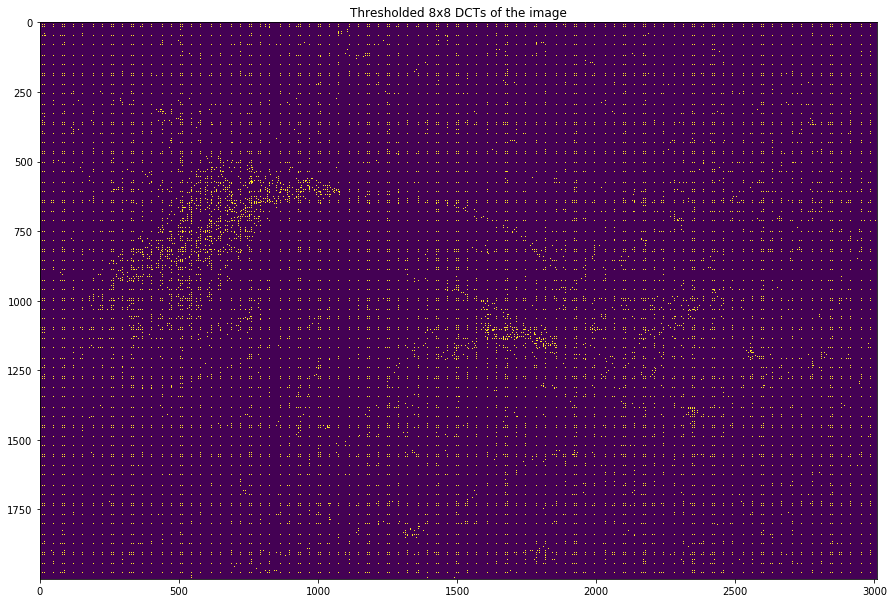

In [36]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure(figsize=(15,15))
plt.imshow(dct_thresh,vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

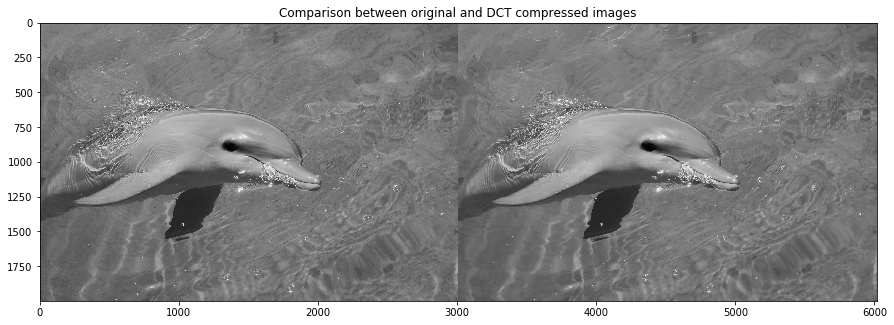

In [20]:
img_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        img_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure(figsize=(15,15))
plt.imshow( np.hstack( (img, img_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )